# Mean Depth Ranking Analysis

In [2]:
import pandas as pd
import numpy as np 
import os 
import scipy 
from scipy import stats
from scipy.stats import spearmanr
import matplotlib.pyplot as plt

Experiment link: https://columbiangwu.co1.qualtrics.com/jfe/form/SV_8jL1tZQEdAg4npI

In [3]:
path = 'cleaned_data.csv'

df = pd.read_csv(path)

In [4]:
participant_ids = [rid for rid in df.ResponseId.unique() if 'R_' in rid]
len(participant_ids), participant_ids[0]

(49, 'R_3rUuplGsyBnH5vp')

In [5]:
catch = {'Q336': 1, 'Q337': 1, 'Q338': 2, 'Q339': 2, 'Q340': 3, 'Q341': 3, 'Q342': 4, 'Q343': 4, 'Q344': 5, 'Q345': 5}

catch_questions = list(catch.keys())
len(catch_questions)

10

In [6]:
# Q16 Q335
questions = [col for col in df.columns.unique() if 'Q' in col and 16 <= int(col[1:]) <= 335]

In [7]:
q_data = {}
for q in questions:
    valid_ranks = [r for r in list(df[q][2:]) if type(r)==str]
    q_ranks = list(map(int, valid_ranks))
    q_data[q] = [q_ranks, np.mean(q_ranks), np.std(q_ranks)]


In [8]:
means = [q_data[key][1] for key in q_data]
stds = [q_data[key][2] for key in q_data]

all_ranks = []
for key in q_data:
    all_ranks += q_data[key][0]

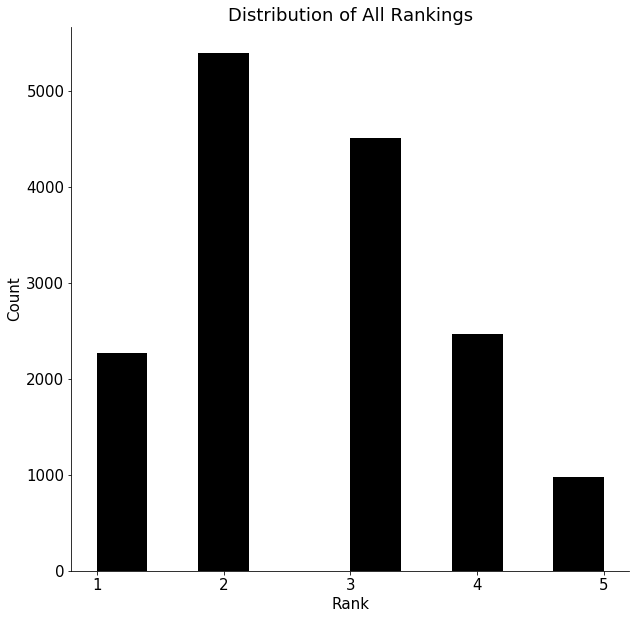

In [9]:
fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Distribution of All Rankings', fontsize=18)    
plt.hist(all_ranks, color='black')
plt.xlabel('Rank', fontsize=15)
plt.ylabel('Count', fontsize=15)

plt.xticks([1, 2, 3, 4, 5], fontsize=15)
plt.yticks(fontsize=15)
plt.show();

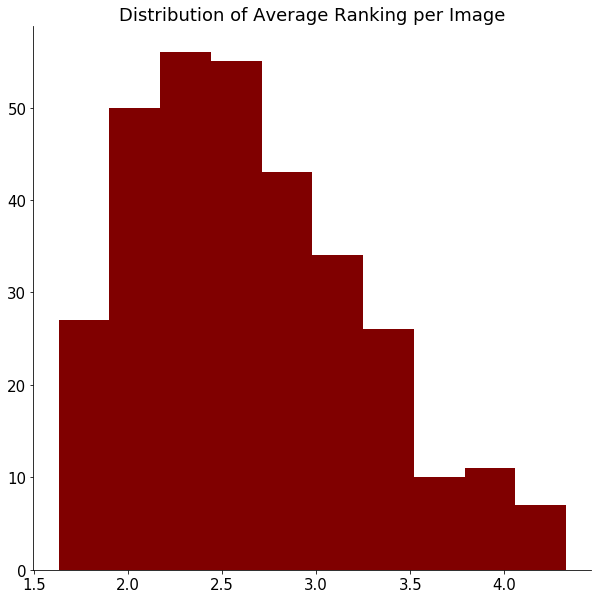

In [10]:
fig, ax = plt.subplots(figsize=[10,10])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Distribution of Average Ranking per Image', fontsize=18)
plt.hist(means, color='maroon')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show();

https://statisticsbyjim.com/basics/spearmans-correlation/

## Take Random splits of the data and calculate the average spearman r correlation 

In [11]:
len(q_data['Q16'][0][:-1])

48

In [15]:
d0 = [1, 2, 5, 3, 2, 2]
d1 = [2, 4, 2, 2, 2, 2]
spearmanr(d0, d1)

SpearmanrResult(correlation=-0.1391216687280505, pvalue=0.7926638356375505)

In [16]:
def split_spearman_corr(input_data, n_splits):
    
    if len(input_data)%2 != 0:
        data = input_data[:-1]
    else:
        data = input_data 
    
    
    # Define split size
    split_size = data.shape[0] // 2
#     print(split_size)

    corr_coeffs = []
    pvals = []

    # Loop over the splits
    for i in range(n_splits):
        # Generate a random permutation of the indices
        indices = np.random.permutation(data.shape[0])

        # Split the data into two parts
        split1 = data[indices[:split_size]]
        split2 = data[indices[split_size:]]

        # Calculate the Spearman's r correlation coefficient
        corr, _ = spearmanr(split1, split2)

        corr_coeffs.append(corr)
        pvals.append(_)

    # Calculate the average correlation coefficient
    avg_corr = np.mean(corr_coeffs)
    
    # Print the result
#     print("Average Spearman's r correlation coefficient:", avg_corr)
#     print(np.mean(pvals))
    
    return avg_corr, np.mean(pvals)

    

In [31]:
n = 10

q_corr = {}
for key in q_data:
    qd = np.array(q_data[key][0])
#     print(key)
    q_corr[key] = split_spearman_corr(qd, n)
    

In [32]:
def get_mode(input_data):
    
    return max(set(input_data), key=input_data.count)


q_modes = {}
for key in q_data:
    qd = q_data[key][0]
    q_modes[key] = get_mode(qd)

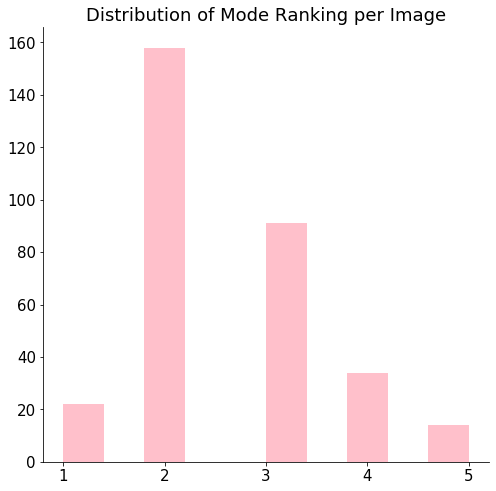

In [36]:
fig, ax = plt.subplots(figsize=[8,8])
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.title('Distribution of Mode Ranking per Image', fontsize=18)
plt.hist([q_modes[key] for key in q_modes], color='pink')
plt.xticks([1, 2, 3, 4, 5], fontsize=15)
plt.yticks(fontsize=15)
plt.show();